## Profile of Body Metrics and Fashion Colors

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.spatial.distance import euclidean
import colorsys

### 데이터 불러오기

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/DAT/4기 과제/6차 과제/Profile of Body Metrics and Fashion Colors.csv", delimiter=';')
df.head(5)

,Height(Centimeter),Weight(Kilograms),Gender,BMI,Skin Color,Clothes Color,Pants Color
0,167.089607,51.252494,Female,Underweight,"(226, 165, 137)","(19, 165, 16)","(24, 212, 123)"
1,181.648633,61.909547,Male,Ideal,"(204, 150, 103)","(55, 238, 252)","(101, 131, 136)"
2,176.272800,69.411778,Male,Ideal,"(226, 165, 137)","(58, 67, 207)","(27, 41, 168)"
3,173.270164,64.562199,Male,Ideal,"(119, 78, 58)","(29, 140, 46)","(71, 123, 25)"
4,172.181037,65.452010,Male,Ideal,"(226, 165, 137)","(200, 235, 99)","(122, 118, 117)"


### 데이터 전처리

(1) RGB 컬럼 값 분리

In [ ]:
df[['Skin_R', 'Skin_G', 'Skin_B']] = df['Skin Color'].str.extract(r'\((\d+), (\d+), (\d+)\)').astype(int)
df[['Clothes_R', 'Clothes_G', 'Clothes_B']] = df['Clothes Color'].str.extract(r'\((\d+), (\d+), (\d+)\)').astype(int)
df[['Pants_R', 'Pants_G', 'Pants_B']] = df['Pants Color'].str.extract(r'\((\d+), (\d+), (\d+)\)').astype(int)

df.drop(columns=['Skin Color', 'Clothes Color', 'Pants Color'], inplace=True)
df.head(5)

,Height(Centimeter),Weight(Kilograms),Gender,BMI,Skin_R,Skin_G,Skin_B,Clothes_R,Clothes_G,Clothes_B,Pants_R,Pants_G,Pants_B
0,167.089607,51.252494,Female,Underweight,226,165,137,19,165,16,24,212,123
1,181.648633,61.909547,Male,Ideal,204,150,103,55,238,252,101,131,136
2,176.272800,69.411778,Male,Ideal,226,165,137,58,67,207,27,41,168
3,173.270164,64.562199,Male,Ideal,119,78,58,29,140,46,71,123,25
4,172.181037,65.452010,Male,Ideal,226,165,137,200,235,99,122,118,117


(2) BMI 데이터 인코딩

In [ ]:
unique_bmi_values = df['BMI'].unique()
unique_bmi_values

array(['Underweight', 'Ideal', 'Overweight'], dtype=object)

In [ ]:
bmi_mapping = {
    'Underweight': 0,  # 저체중
    'Ideal': 1,        # 정상 체중
    'Overweight': 2    # 과체중
}

df['BMI'] = df['BMI'].map(bmi_mapping)

df.head(5)

,Height(Centimeter),Weight(Kilograms),Gender,BMI,Skin_R,Skin_G,Skin_B,Clothes_R,Clothes_G,Clothes_B,Pants_R,Pants_G,Pants_B
0,167.089607,51.252494,Female,0,226,165,137,19,165,16,24,212,123
1,181.648633,61.909547,Male,1,204,150,103,55,238,252,101,131,136
2,176.272800,69.411778,Male,1,226,165,137,58,67,207,27,41,168
3,173.270164,64.562199,Male,1,119,78,58,29,140,46,71,123,25
4,172.181037,65.452010,Male,1,226,165,137,200,235,99,122,118,117


(3) 성별(Gender) 데이터 인코딩

In [ ]:
unique_gender_values = df['Gender'].unique()
unique_gender_values

array(['Female', 'Male'], dtype=object)

In [ ]:
gender_mapping = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(gender_mapping)
df.head(5)

,Height(Centimeter),Weight(Kilograms),Gender,BMI,Skin_R,Skin_G,Skin_B,Clothes_R,Clothes_G,Clothes_B,Pants_R,Pants_G,Pants_B
0,167.089607,51.252494,0,0,226,165,137,19,165,16,24,212,123
1,181.648633,61.909547,1,1,204,150,103,55,238,252,101,131,136
2,176.272800,69.411778,1,1,226,165,137,58,67,207,27,41,168
3,173.270164,64.562199,1,1,119,78,58,29,140,46,71,123,25
4,172.181037,65.452010,1,1,226,165,137,200,235,99,122,118,117


(4) 이상값 및 결측값 확인/데이터 타입 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Height(Centimeter)  25000 non-null  float64
 1   Weight(Kilograms)   25000 non-null  float64
 2   Gender              25000 non-null  int64  
 3   BMI                 25000 non-null  int64  
 4   Skin_R              25000 non-null  int64  
 5   Skin_G              25000 non-null  int64  
 6   Skin_B              25000 non-null  int64  
 7   Clothes_R           25000 non-null  int64  
 8   Clothes_G           25000 non-null  int64  
 9   Clothes_B           25000 non-null  int64  
 10  Pants_R             25000 non-null  int64  
 11  Pants_G             25000 non-null  int64  
 12  Pants_B             25000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 2.5 MB


In [ ]:
output_file_path = '/content/gdrive/MyDrive/DAT/4기 과제/6차 과제/Profile of Body Metrics and Fashion Colors2.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

In [ ]:
# RGB 값을 정수(int)로 변환 후 Hex 코드 생성
df['Clothes_Color_Hex'] = df.apply(
    lambda row: '#{:02X}{:02X}{:02X}'.format(int(row['Clothes_R']), int(row['Clothes_G']), int(row['Clothes_B'])),
    axis=1
)
df['Pants_Color_Hex'] = df.apply(
    lambda row: '#{:02X}{:02X}{:02X}'.format(int(row['Pants_R']), int(row['Pants_G']), int(row['Pants_B'])),
    axis=1
)
df.to_csv('/content/gdrive/MyDrive/DAT/4기 과제/6차 과제/Profile of Body Metrics and Fashion Colors3.csv', index=False)

### 목표1: 성별과 BMI에 따른 옷과 바지 색상 선호도 분석

- 성별 및 BMI 카테고리별로 옷과 바지 색상(RGB 값)의 분포를 분석

- 특정 그룹에서 선호하는 색상 패턴을 시각화.

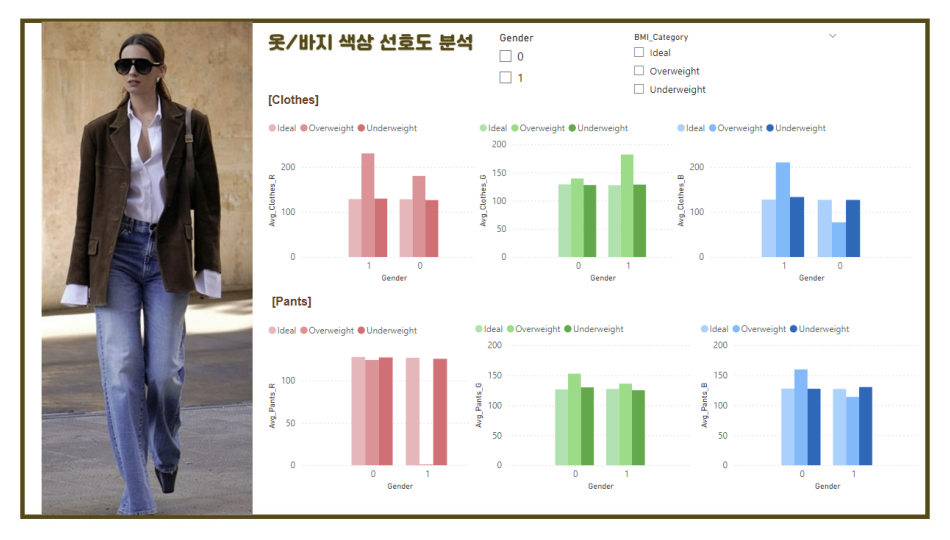

In [ ]:
image = Image.open('/content/gdrive/MyDrive/DAT/4기 과제/6차 과제/패션 데이터 분석.png')

plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# 성별과 BMI에 따른 옷과 바지 색상 평균값 계산
clothes_mean = df.groupby(['Gender', 'BMI'])[['Clothes_R', 'Clothes_G', 'Clothes_B']].mean()
pants_mean = df.groupby(['Gender', 'BMI'])[['Pants_R', 'Pants_G', 'Pants_B']].mean()

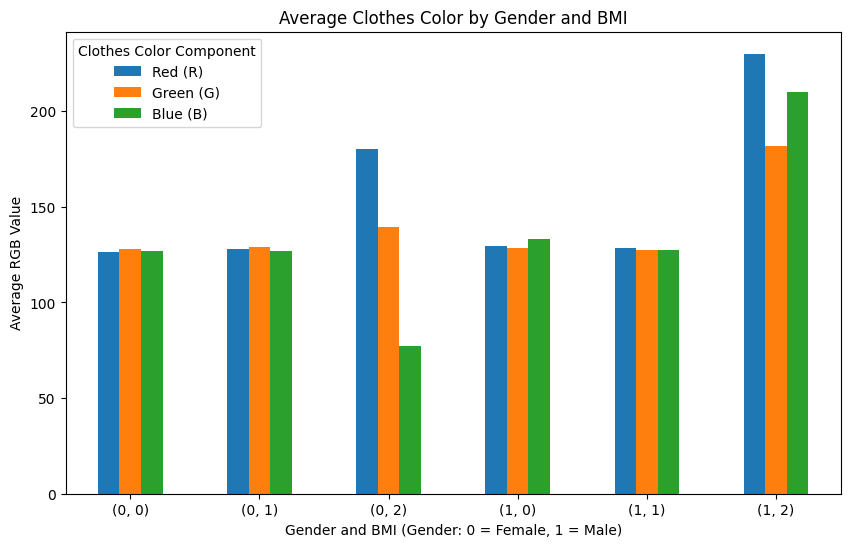

In [ ]:
# 성별과 BMI에 따른 옷 색상 평균값 시각화
clothes_mean.plot(kind='bar', figsize=(10, 6))
plt.title('Average Clothes Color by Gender and BMI')
plt.xlabel('Gender and BMI (Gender: 0 = Female, 1 = Male)')
plt.ylabel('Average RGB Value')
plt.legend(['Red (R)', 'Green (G)', 'Blue (B)'], title='Clothes Color Component')
plt.xticks(rotation=0)
plt.show()

- 여성(0)과 남성(1) 모두에서 빨간색(R) 값이 다른 색상에 비해 평균적으로 높습니다. 이는 사람들이 선호하는 옷 색상에서 빨간색이 두드러지게 나타나는 경향을 보여줍니다.

- 과체중 그룹(2)은 다른 BMI 그룹에 비해 빨간색 값이 더 높고, 초록색(G)과 파란색(B) 값은 상대적으로 낮습니다. 이는 과체중 그룹이 더 따뜻한 색상(빨간색)을 선호하는 경향이 있을 수 있음을 시사합니다.

- 정상 체중(BMI 1)과 저체중(BMI 0) 그룹은 초록색(G)과 파란색(B)의 비율이 상대적으로 비슷하며, 빨간색(R)이 좀 더 낮습니다. 이는 이 두 그룹에서 차가운 색을 선호하는 경향을 나타낼 수 있습니다.

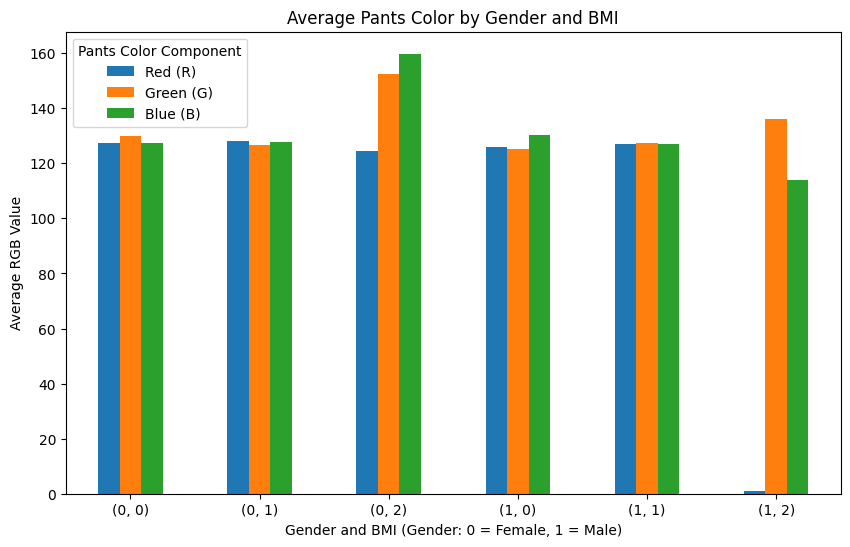

In [ ]:
# 성별과 BMI에 따른 바지 색상 평균값 시각화
pants_mean.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pants Color by Gender and BMI')
plt.xlabel('Gender and BMI (Gender: 0 = Female, 1 = Male)')
plt.ylabel('Average RGB Value')
plt.legend(['Red (R)', 'Green (G)', 'Blue (B)'], title='Pants Color Component')
plt.xticks(rotation=0)
plt.show()

- 빨간색(R), 초록색(G), 파란색(B) 값이 옷 색상에 비해 바지 색상에서는 상대적으로 비슷한 패턴을 보입니다.

- 여성(Gender 0)과 남성(Gender 1) 모두에서 초록색(G) 값이 높으며, 빨간색(R)과 파란색(B)은 거의 동일하게 분포합니다.

- BMI가 과체중일 경우(값 2), 초록색(G)이 상대적으로 더 많이 선호되는 경향이 있습니다.

In [ ]:
# 성별과 BMI 조합별로 옷 색상의 평균 RGB 값 계산
clothes_mean_R = df.pivot_table(values='Clothes_R', index='Gender', columns='BMI', aggfunc='mean')
clothes_mean_G = df.pivot_table(values='Clothes_G', index='Gender', columns='BMI', aggfunc='mean')
clothes_mean_B = df.pivot_table(values='Clothes_B', index='Gender', columns='BMI', aggfunc='mean')

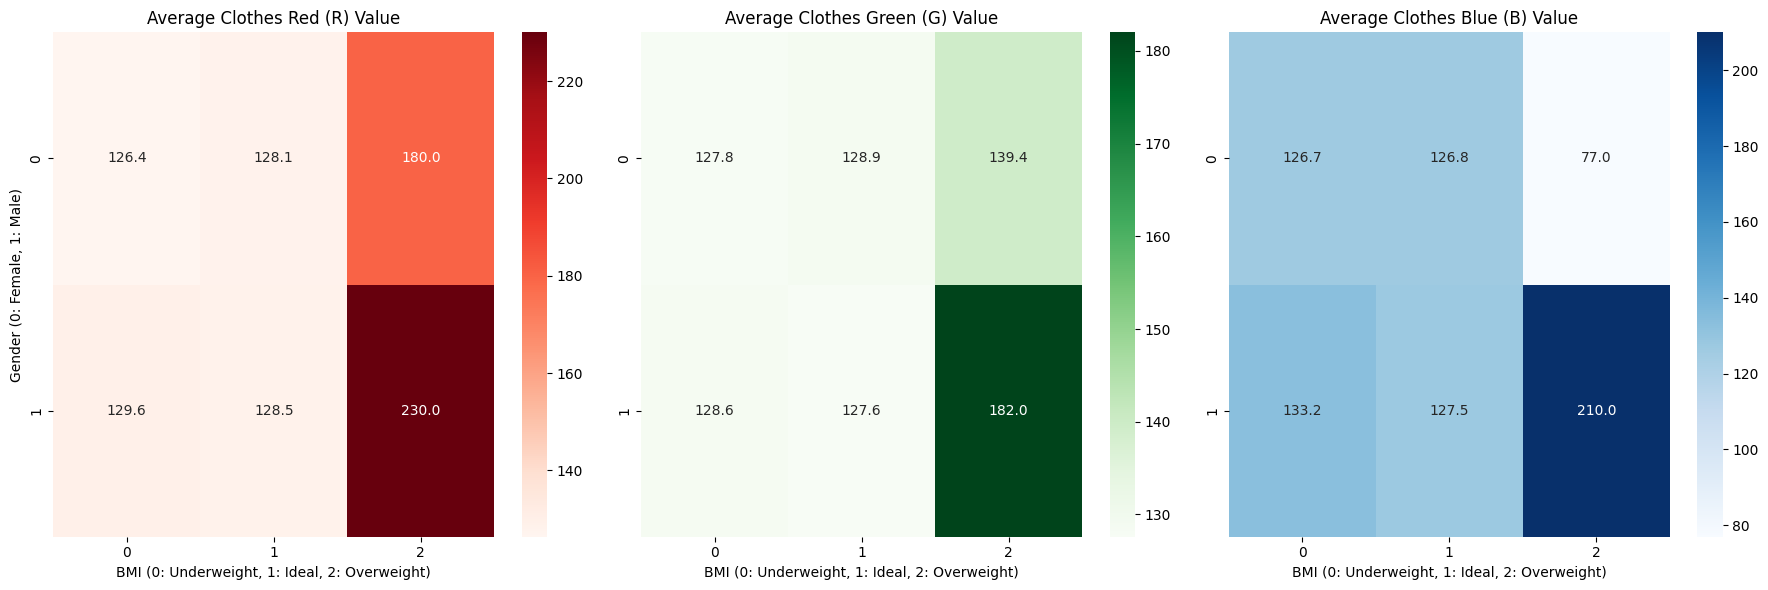

In [ ]:
# 히트맵을 한 줄로 표현하기 위한 코드
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Red 히트맵
sns.heatmap(clothes_mean_R, annot=True, fmt=".1f", cmap="Reds", cbar=True, ax=axes[0])
axes[0].set_title('Average Clothes Red (R) Value')
axes[0].set_xlabel('BMI (0: Underweight, 1: Ideal, 2: Overweight)')
axes[0].set_ylabel('Gender (0: Female, 1: Male)')

# Green 히트맵
sns.heatmap(clothes_mean_G, annot=True, fmt=".1f", cmap="Greens", cbar=True, ax=axes[1])
axes[1].set_title('Average Clothes Green (G) Value')
axes[1].set_xlabel('BMI (0: Underweight, 1: Ideal, 2: Overweight)')
axes[1].set_ylabel('')

# Blue 히트맵
sns.heatmap(clothes_mean_B, annot=True, fmt=".1f", cmap="Blues", cbar=True, ax=axes[2])
axes[2].set_title('Average Clothes Blue (B) Value')
axes[2].set_xlabel('BMI (0: Underweight, 1: Ideal, 2: Overweight)')
axes[2].set_ylabel('')

# 그래프 간격 조정
plt.tight_layout()
plt.show()

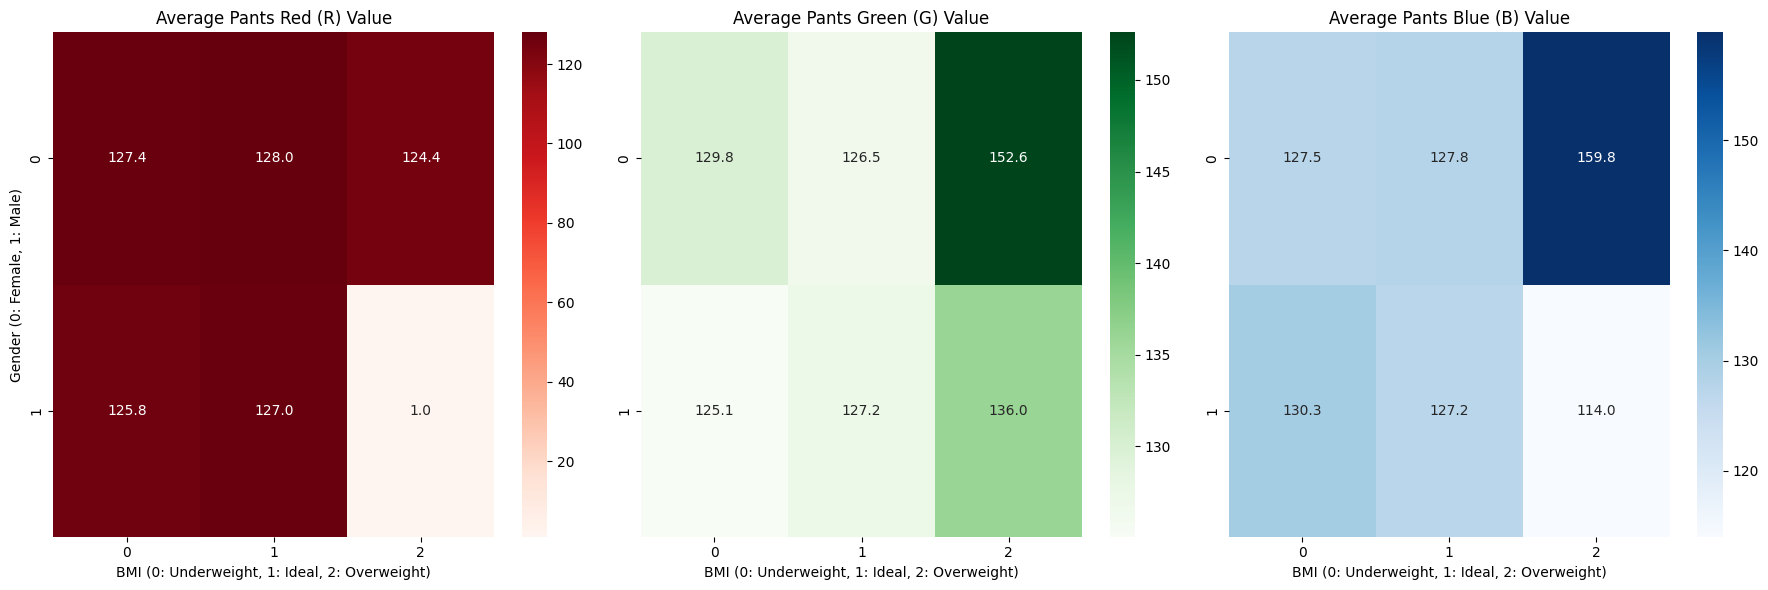

In [ ]:
# 성별과 BMI 조합별로 바지 색상의 평균 RGB 값 계산
pants_mean_R = df.pivot_table(values='Pants_R', index='Gender', columns='BMI', aggfunc='mean')
pants_mean_G = df.pivot_table(values='Pants_G', index='Gender', columns='BMI', aggfunc='mean')
pants_mean_B = df.pivot_table(values='Pants_B', index='Gender', columns='BMI', aggfunc='mean')

# 히트맵을 한 줄로 표현하기 위한 코드 (바지 색상)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Red 히트맵
sns.heatmap(pants_mean_R, annot=True, fmt=".1f", cmap="Reds", cbar=True, ax=axes[0])
axes[0].set_title('Average Pants Red (R) Value')
axes[0].set_xlabel('BMI (0: Underweight, 1: Ideal, 2: Overweight)')
axes[0].set_ylabel('Gender (0: Female, 1: Male)')

# Green 히트맵
sns.heatmap(pants_mean_G, annot=True, fmt=".1f", cmap="Greens", cbar=True, ax=axes[1])
axes[1].set_title('Average Pants Green (G) Value')
axes[1].set_xlabel('BMI (0: Underweight, 1: Ideal, 2: Overweight)')
axes[1].set_ylabel('')

# Blue 히트맵
sns.heatmap(pants_mean_B, annot=True, fmt=".1f", cmap="Blues", cbar=True, ax=axes[2])
axes[2].set_title('Average Pants Blue (B) Value')
axes[2].set_xlabel('BMI (0: Underweight, 1: Ideal, 2: Overweight)')
axes[2].set_ylabel('')

# 그래프 간격 조정
plt.tight_layout()
plt.show()

- 과체중(2) 그룹은 빨간색과 파란색을 선호하는 경향이 강하고, 정상 체중(1)과 저체중(0) 그룹은 비교적 초록색에 대한 선호도가 더 균등합니다.

- 성별에 따라 색상 선호도의 차이가 있을 수 있으며, 특히 남성 그룹에서는 **빨간색(R)**과 **파란색(B)**의 선호도가 더 강하게 나타납니다.

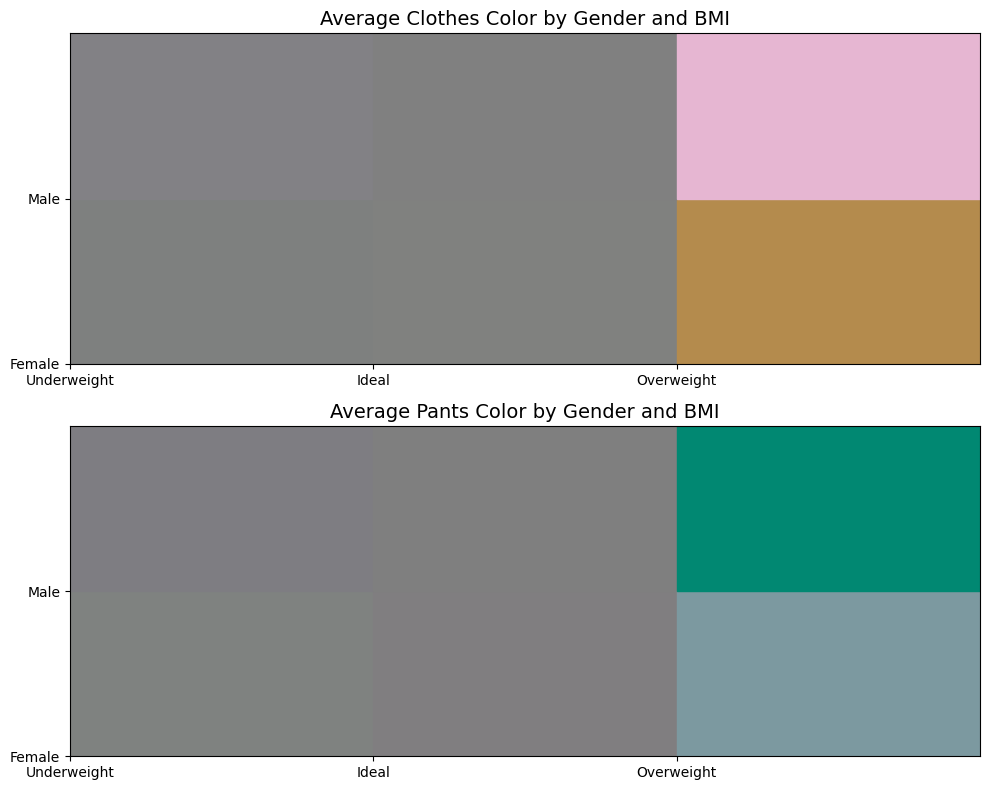

In [ ]:
# 평균 RGB 값 계산 (옷과 바지)
rgb_means_clothes = df.groupby(['Gender', 'BMI'])[['Clothes_R', 'Clothes_G', 'Clothes_B']].mean()
rgb_means_pants = df.groupby(['Gender', 'BMI'])[['Pants_R', 'Pants_G', 'Pants_B']].mean()

# 시각화
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 옷 색상 평균 시각화
axes[0].set_title("Average Clothes Color by Gender and BMI", fontsize=14)
for i, gender in enumerate(['Female', 'Male']):
    for j, bmi in enumerate(['Underweight', 'Ideal', 'Overweight']):
        if (i, j) in rgb_means_clothes.index:
            rgb = rgb_means_clothes.loc[(i, j), ['Clothes_R', 'Clothes_G', 'Clothes_B']]
            color = mcolors.to_hex([rgb['Clothes_R'] / 255, rgb['Clothes_G'] / 255, rgb['Clothes_B'] / 255])
            rect = patches.Rectangle((j, i), 1, 1, color=color)
            axes[0].add_patch(rect)
axes[0].set_xticks(range(3))
axes[0].set_xticklabels(['Underweight', 'Ideal', 'Overweight'])
axes[0].set_yticks(range(2))
axes[0].set_yticklabels(['Female', 'Male'])
axes[0].set_xlim(0, 3)
axes[0].set_ylim(0, 2)

# 바지 색상 평균 시각화
axes[1].set_title("Average Pants Color by Gender and BMI", fontsize=14)
for i, gender in enumerate(['Female', 'Male']):
    for j, bmi in enumerate(['Underweight', 'Ideal', 'Overweight']):
        if (i, j) in rgb_means_pants.index:
            rgb = rgb_means_pants.loc[(i, j), ['Pants_R', 'Pants_G', 'Pants_B']]
            color = mcolors.to_hex([rgb['Pants_R'] / 255, rgb['Pants_G'] / 255, rgb['Pants_B'] / 255])
            rect = patches.Rectangle((j, i), 1, 1, color=color)
            axes[1].add_patch(rect)
axes[1].set_xticks(range(3))
axes[1].set_xticklabels(['Underweight', 'Ideal', 'Overweight'])
axes[1].set_yticks(range(2))
axes[1].set_yticklabels(['Female', 'Male'])
axes[1].set_xlim(0, 3)
axes[1].set_ylim(0, 2)

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

- 옷 색상에서는 과체중인 사람들이 더 따뜻한 색(빨간색)을 선호하는 경향이 있고, 바지 색상에서는 차가운 색상(초록색, 파란색)이 선호되는 경향이 강합니다.

- 성별에 따른 색상 선호도 차이가 크지 않으며, 주로 BMI에 따라 선호하는 색상 차이가 나타납니다.

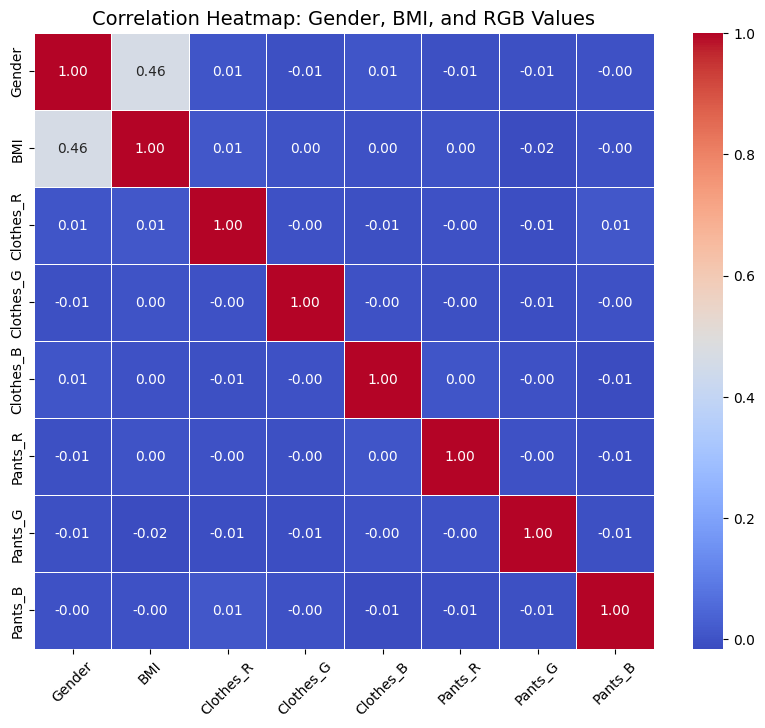

In [ ]:
# RGB 값과 성별, BMI 간 상관계수 계산
correlation_matrix = df[['Gender', 'BMI', 'Clothes_R', 'Clothes_G', 'Clothes_B',
                         'Pants_R', 'Pants_G', 'Pants_B']].corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap: Gender, BMI, and RGB Values', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- 성별과 BMI 간에 일정한 상관관계가 있지만, 색상 선호도(RGB 값)와는 큰 관계가 없습니다. 즉, 성별과 BMI는 색상 선택에 영향을 미치지 않는 경향이 강합니다.

- RGB 값(옷 색상 및 바지 색상) 간에는 강한 상관관계가 존재하며, 옷 색상과 바지 색상이 비슷한 색상 선호도를 보여주고 있습니다.

- 성별과 BMI는 색상 선호도와 독립적이거나 상관관계가 매우 약하므로, 색상 선호도는 다른 변수에 의해 결정될 수 있음을 시사합니다.

### 목표2: 피부 색상에 따른 옷과 바지 색상 선호도 분석

- 유클리드 거리(Euclidean Distance)를 활용하여 피부색과 옷/바지 색상 간의 색상 조화를 정량화.

- 조화도가 높은 색상 조합을 추천.

- 피부색과 옷/바지 색상 간 상관관계

<ipython-input-37-c92b264b0fbb>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance_mean.index, y=distance_mean.values, palette='coolwarm')


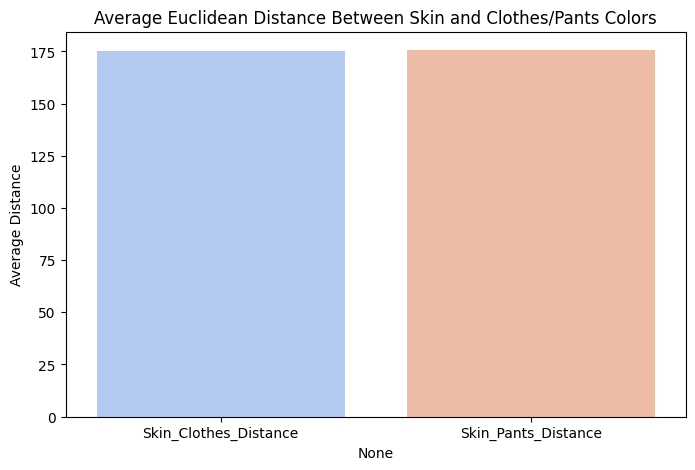

In [ ]:
# 피부색과 옷 색상의 유클리드 거리 계산
df['Skin_Clothes_Distance'] = df.apply(
    lambda row: euclidean(
        (row['Skin_R'], row['Skin_G'], row['Skin_B']),
        (row['Clothes_R'], row['Clothes_G'], row['Clothes_B'])
    ),
    axis=1
)

# 피부색과 바지 색상의 유클리드 거리 계산
df['Skin_Pants_Distance'] = df.apply(
    lambda row: euclidean(
        (row['Skin_R'], row['Skin_G'], row['Skin_B']),
        (row['Pants_R'], row['Pants_G'], row['Pants_B'])
    ),
    axis=1
)

# 거리 평균 계산
distance_mean = df[['Skin_Clothes_Distance', 'Skin_Pants_Distance']].mean()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=distance_mean.index, y=distance_mean.values, palette='coolwarm')
plt.title('Average Euclidean Distance Between Skin and Clothes/Pants Colors')
plt.ylabel('Average Distance')
plt.show()

피부색과 패션 색상 간의 거리 차이가 크지 않으므로, 일반적으로 옷과 바지 색상 모두 피부색과 비슷한 수준의 조화를 이루는 것으로 보입니다.

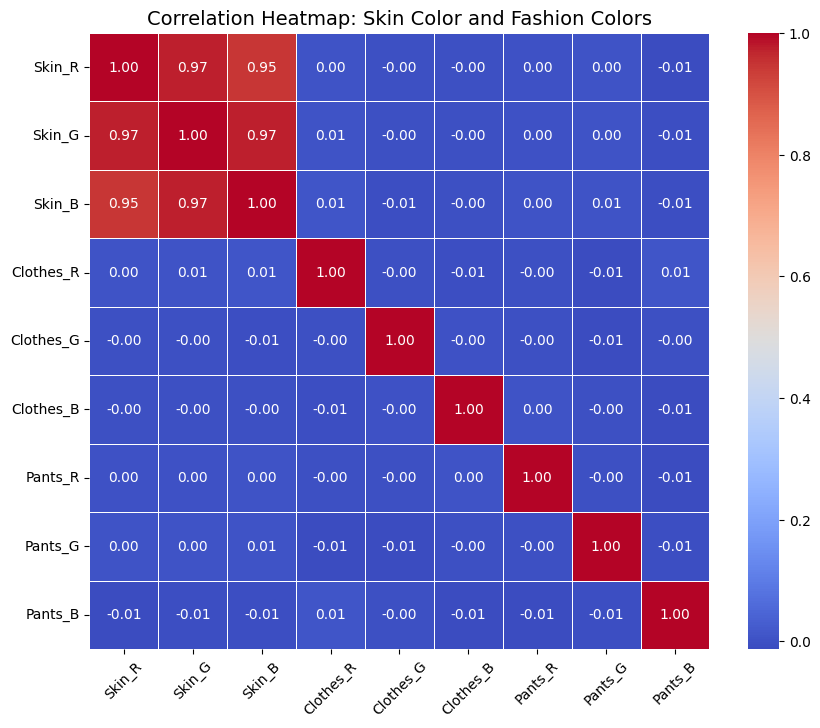

In [ ]:
# 피부색과 패션 색상 간 상관계수 계산
correlation_matrix_skin = df[['Skin_R', 'Skin_G', 'Skin_B', 'Clothes_R', 'Clothes_G', 'Clothes_B',
                              'Pants_R', 'Pants_G', 'Pants_B']].corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_skin, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap: Skin Color and Fashion Colors', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- 피부색과 옷 색상 간에는 상관관계가 거의 없으며, 피부색이 옷 색상 선택에 영향을 미치지 않는 경향을 보입니다.

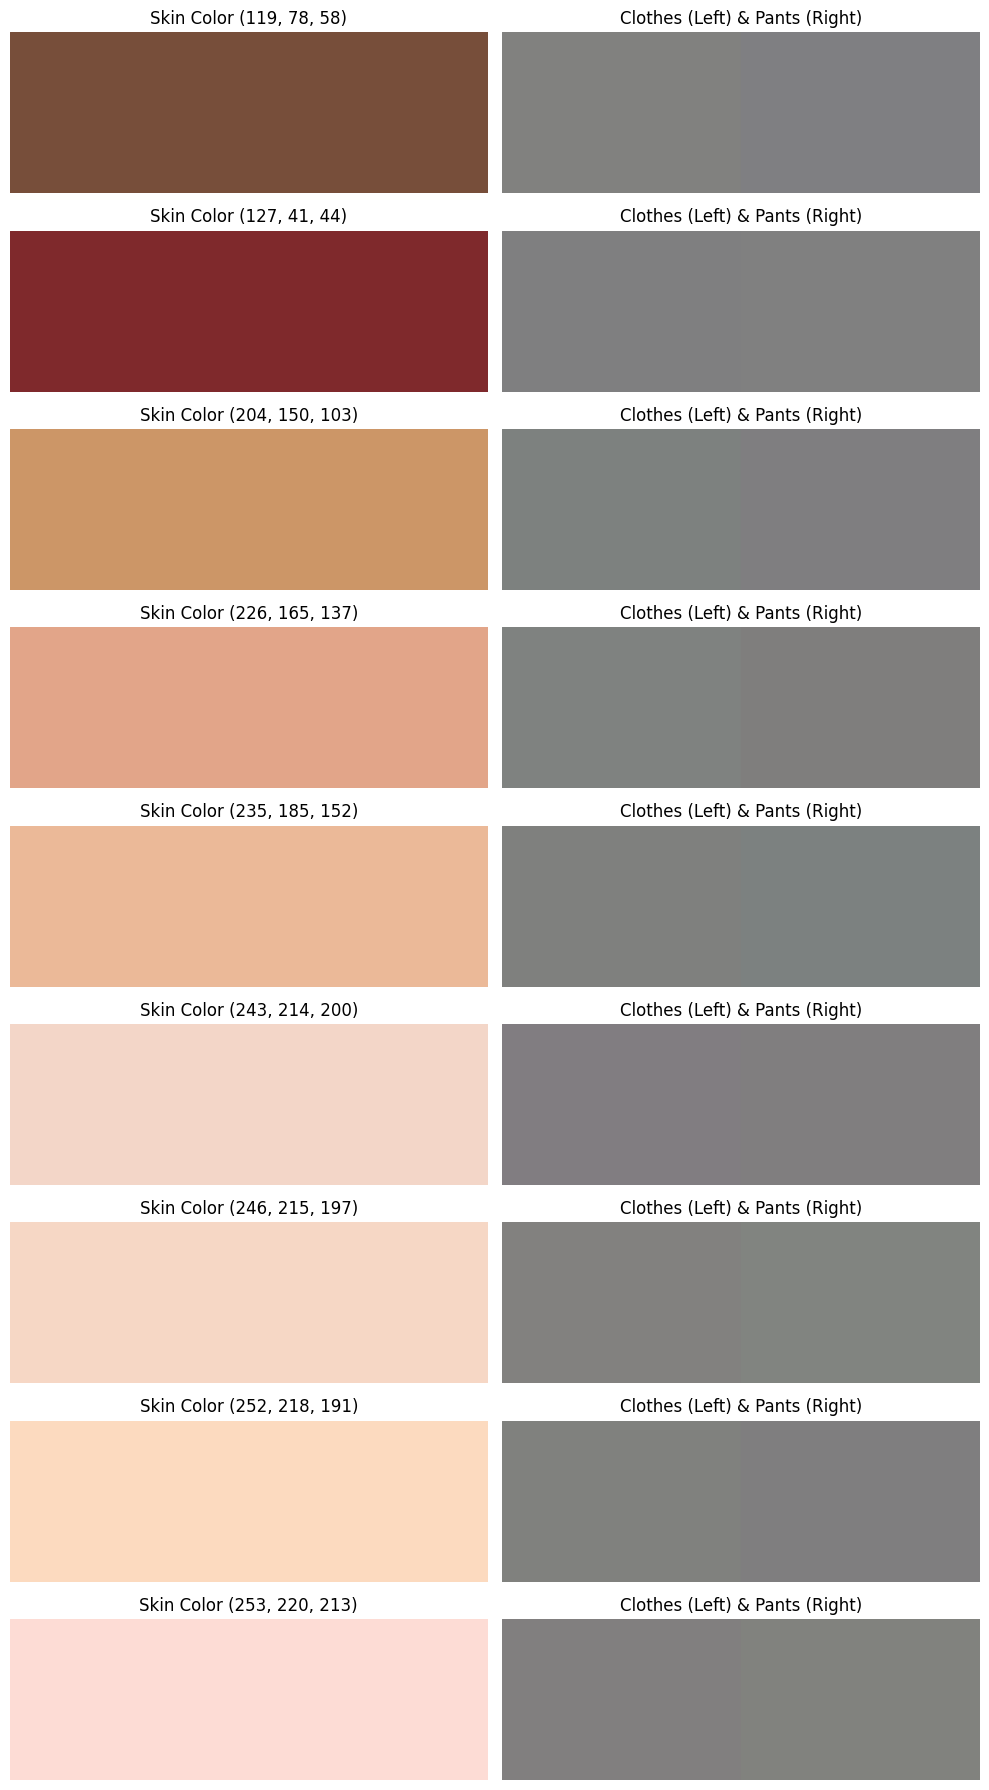

In [ ]:
# 피부색을 기준으로 옷과 바지 색상의 RGB 평균값 계산
skin_clothes_means = df.groupby(['Skin_R', 'Skin_G', 'Skin_B'])[['Clothes_R', 'Clothes_G', 'Clothes_B']].mean()
skin_pants_means = df.groupby(['Skin_R', 'Skin_G', 'Skin_B'])[['Pants_R', 'Pants_G', 'Pants_B']].mean()

# 시각화를 위한 데이터 준비
skin_groups = skin_clothes_means.index
fig, axes = plt.subplots(len(skin_groups), 2, figsize=(10, len(skin_groups) * 2))

# 시각화: 각 피부색 그룹의 옷과 바지 색상을 시각적으로 표시
for i, (skin_rgb, clothes_rgb, pants_rgb) in enumerate(
    zip(skin_groups, skin_clothes_means.values, skin_pants_means.values)
):
    skin_color = [c / 255 for c in skin_rgb]  # 피부색
    clothes_color = [c / 255 for c in clothes_rgb]  # 옷 색상
    pants_color = [c / 255 for c in pants_rgb]  # 바지 색상

    # 피부색 표시
    axes[i, 0].add_patch(patches.Rectangle((0, 0), 1, 1, color=skin_color))
    axes[i, 0].set_xlim(0, 1)
    axes[i, 0].set_ylim(0, 1)
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"Skin Color {skin_rgb}")

    # 옷과 바지 색상 표시
    axes[i, 1].add_patch(patches.Rectangle((0, 0), 1, 1, color=clothes_color))
    axes[i, 1].add_patch(patches.Rectangle((1, 0), 1, 1, color=pants_color))
    axes[i, 1].set_xlim(0, 2)
    axes[i, 1].set_ylim(0, 1)
    axes[i, 1].axis('off')
    axes[i, 1].set_title("Clothes (Left) & Pants (Right)")

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
# RGB to HSL 변환 함수
def rgb_to_hsl(r, g, b):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    return h * 360, s, l  # Hue는 0~360 범위로 변환

# 피부색, 옷 색상, 바지 색상을 HSL로 변환
df['Skin_H'], df['Skin_S'], df['Skin_L'] = zip(*df.apply(lambda row: rgb_to_hsl(row['Skin_R'], row['Skin_G'], row['Skin_B']), axis=1))
df['Clothes_H'], df['Clothes_S'], df['Clothes_L'] = zip(*df.apply(lambda row: rgb_to_hsl(row['Clothes_R'], row['Clothes_G'], row['Clothes_B']), axis=1))
df['Pants_H'], df['Pants_S'], df['Pants_L'] = zip(*df.apply(lambda row: rgb_to_hsl(row['Pants_R'], row['Pants_G'], row['Pants_B']), axis=1))

# 색상 유형 분류 함수 (Hue 기준)
def categorize_hue(hue):
    if 0 <= hue < 30 or 330 <= hue <= 360:
        return 'Warm (Red/Orange)'
    elif 30 <= hue < 90:
        return 'Warm (Yellow)'
    elif 90 <= hue < 150:
        return 'Cool (Green)'
    elif 150 <= hue < 210:
        return 'Cool (Cyan)'
    elif 210 <= hue < 270:
        return 'Cool (Blue)'
    else:
        return 'Neutral (Purple)'

# 피부색, 옷 색상, 바지 색상의 색상 유형 분류
df['Skin_Type'] = df['Skin_H'].apply(categorize_hue)
df['Clothes_Type'] = df['Clothes_H'].apply(categorize_hue)
df['Pants_Type'] = df['Pants_H'].apply(categorize_hue)

In [ ]:
# 색상 유형별 선호도 계산
clothes_preference = df.groupby('Skin_Type')['Clothes_Type'].value_counts(normalize=True).unstack(fill_value=0)
pants_preference = df.groupby('Skin_Type')['Pants_Type'].value_counts(normalize=True).unstack(fill_value=0)

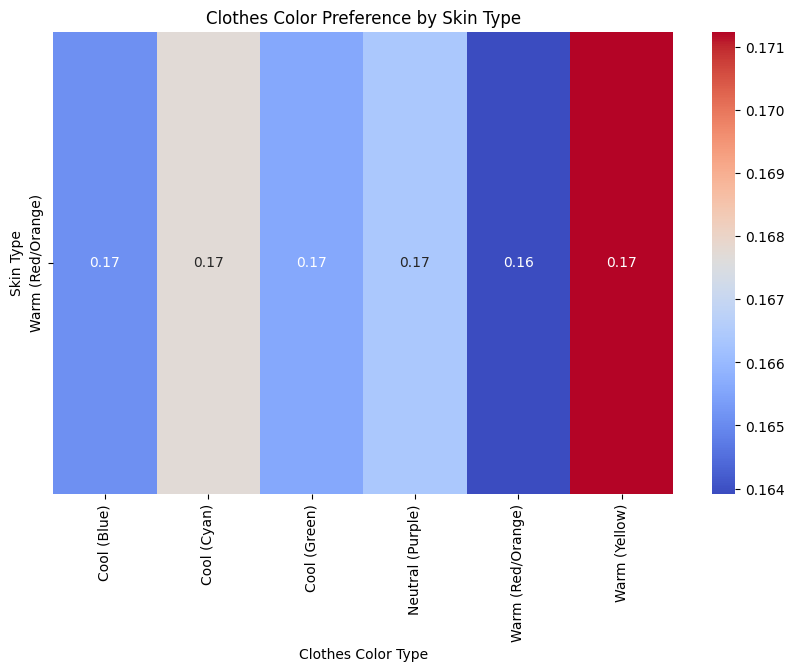

In [ ]:
# 옷 색상 선호도 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(clothes_preference, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Clothes Color Preference by Skin Type')
plt.xlabel('Clothes Color Type')
plt.ylabel('Skin Type')
plt.show()

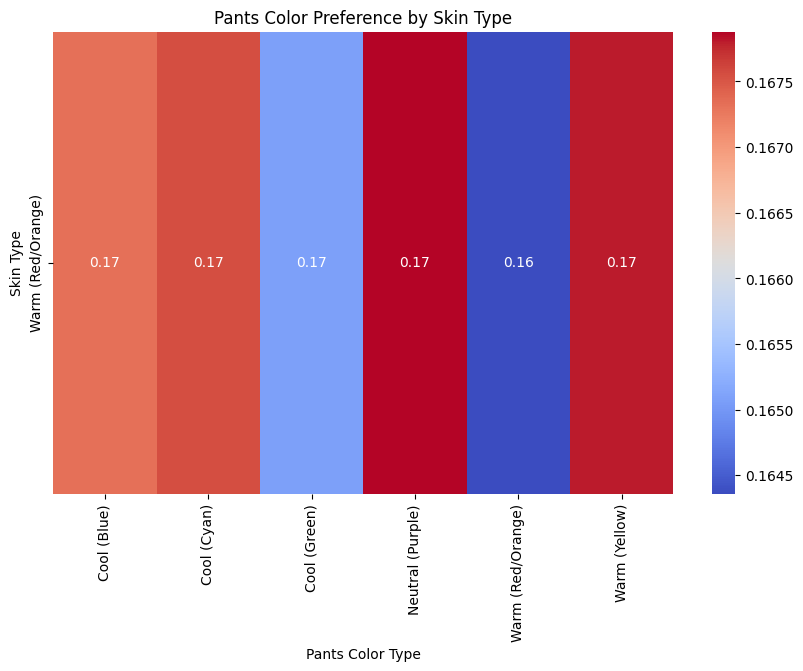

In [ ]:
# 바지 색상 선호도 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pants_preference, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Pants Color Preference by Skin Type')
plt.xlabel('Pants Color Type')
plt.ylabel('Skin Type')
plt.show()

- 피부색 유형은 옷 색상과 바지 색상 선호도에 큰 영향을 미치지 않으며, 선호도는 거의 동일한 수준에서 분포하고 있습니다.

- 피부색 유형에 상관없이 Cool(청색 계열), Neutral(보라색), Warm(빨강/주황, 노랑) 색상 유형의 선호도가 비슷하다는 것을 보여줍니다.

### 목표3: 키와 몸무게에 따른 옷과 바지 색상 선호도 분석

- 키와 몸무게 그룹에 따라 선호하는 옷/바지 색상을 분석

- 키와 몸무게의 분포에 따른 색상 선호도 히트맵

- 키와 몸무게로 색상 유형 분류

<ipython-input-53-affddf3aa5dc>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_colors = df.groupby(['Height_Group', 'Weight_Group'])[['Clothes_R', 'Clothes_G', 'Clothes_B', 'Pants_R', 'Pants_G', 'Pants_B']].mean()


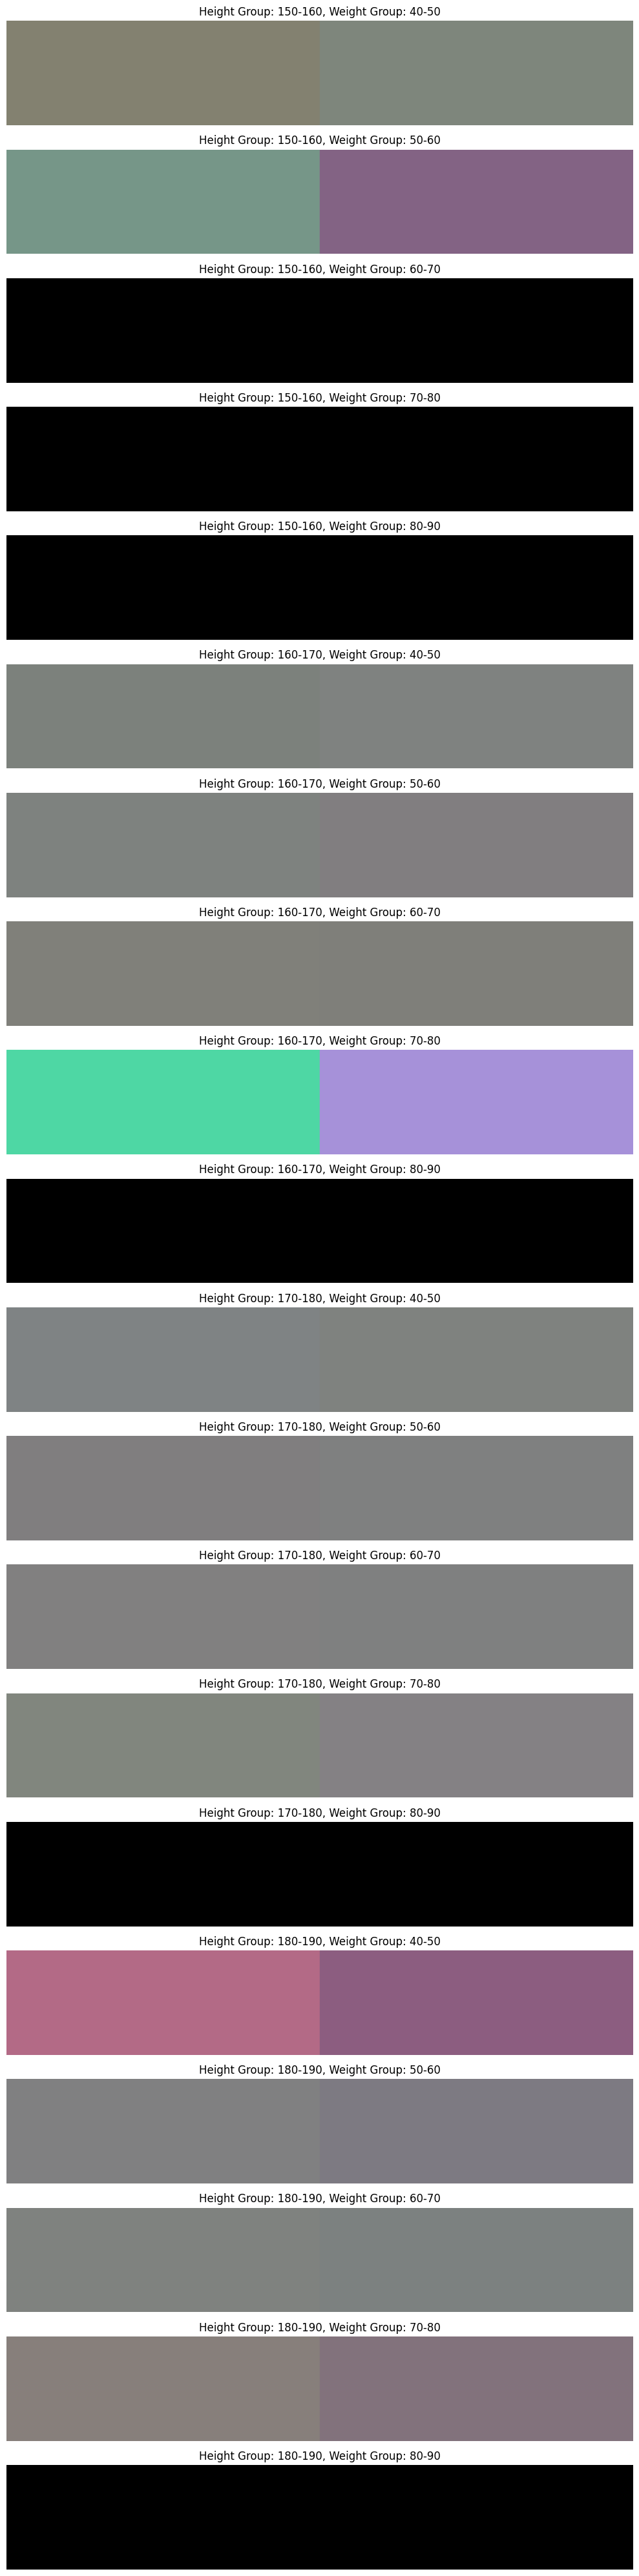

In [ ]:
# 키와 몸무게를 그룹화
df['Height_Group'] = pd.cut(df['Height(Centimeter)'], bins=[150, 160, 170, 180, 190], labels=['150-160', '160-170', '170-180', '180-190'])
df['Weight_Group'] = pd.cut(df['Weight(Kilograms)'], bins=[40, 50, 60, 70, 80, 90], labels=['40-50', '50-60', '60-70', '70-80', '80-90'])

# 그룹별 옷과 바지 색상 평균 계산
grouped_colors = df.groupby(['Height_Group', 'Weight_Group'])[['Clothes_R', 'Clothes_G', 'Clothes_B', 'Pants_R', 'Pants_G', 'Pants_B']].mean()

# 시각화
fig, axes = plt.subplots(len(grouped_colors), 1, figsize=(10, len(grouped_colors) * 2))

for i, (index, colors) in enumerate(grouped_colors.iterrows()):
    clothes_color = [colors['Clothes_R'] / 255, colors['Clothes_G'] / 255, colors['Clothes_B'] / 255]
    pants_color = [colors['Pants_R'] / 255, colors['Pants_G'] / 255, colors['Pants_B'] / 255]

    # 키와 몸무게 그룹 표시
    ax = axes[i]
    ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=clothes_color))
    ax.add_patch(plt.Rectangle((1, 0), 1, 1, color=pants_color))
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.set_title(f'Height Group: {index[0]}, Weight Group: {index[1]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 키와 몸무게를 그룹화
df['Height_Group'] = pd.cut(df['Height(Centimeter)'], bins=[150, 160, 170, 180, 190], labels=['150-160', '160-170', '170-180', '180-190'])
df['Weight_Group'] = pd.cut(df['Weight(Kilograms)'], bins=[40, 50, 60, 70, 80, 90], labels=['40-50', '50-60', '60-70', '70-80', '80-90'])

# 키와 몸무게 조합별 옷 색상의 R, G, B 값 평균 계산
clothes_r_mean = df.pivot_table(values='Clothes_R', index='Height_Group', columns='Weight_Group', aggfunc='mean')
clothes_g_mean = df.pivot_table(values='Clothes_G', index='Height_Group', columns='Weight_Group', aggfunc='mean')
clothes_b_mean = df.pivot_table(values='Clothes_B', index='Height_Group', columns='Weight_Group', aggfunc='mean')

<ipython-input-54-4a6748fcb7f5>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  clothes_r_mean = df.pivot_table(values='Clothes_R', index='Height_Group', columns='Weight_Group', aggfunc='mean')
<ipython-input-54-4a6748fcb7f5>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  clothes_g_mean = df.pivot_table(values='Clothes_G', index='Height_Group', columns='Weight_Group', aggfunc='mean')
<ipython-input-54-4a6748fcb7f5>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  clothes_b_mean = df.pivot_table(value

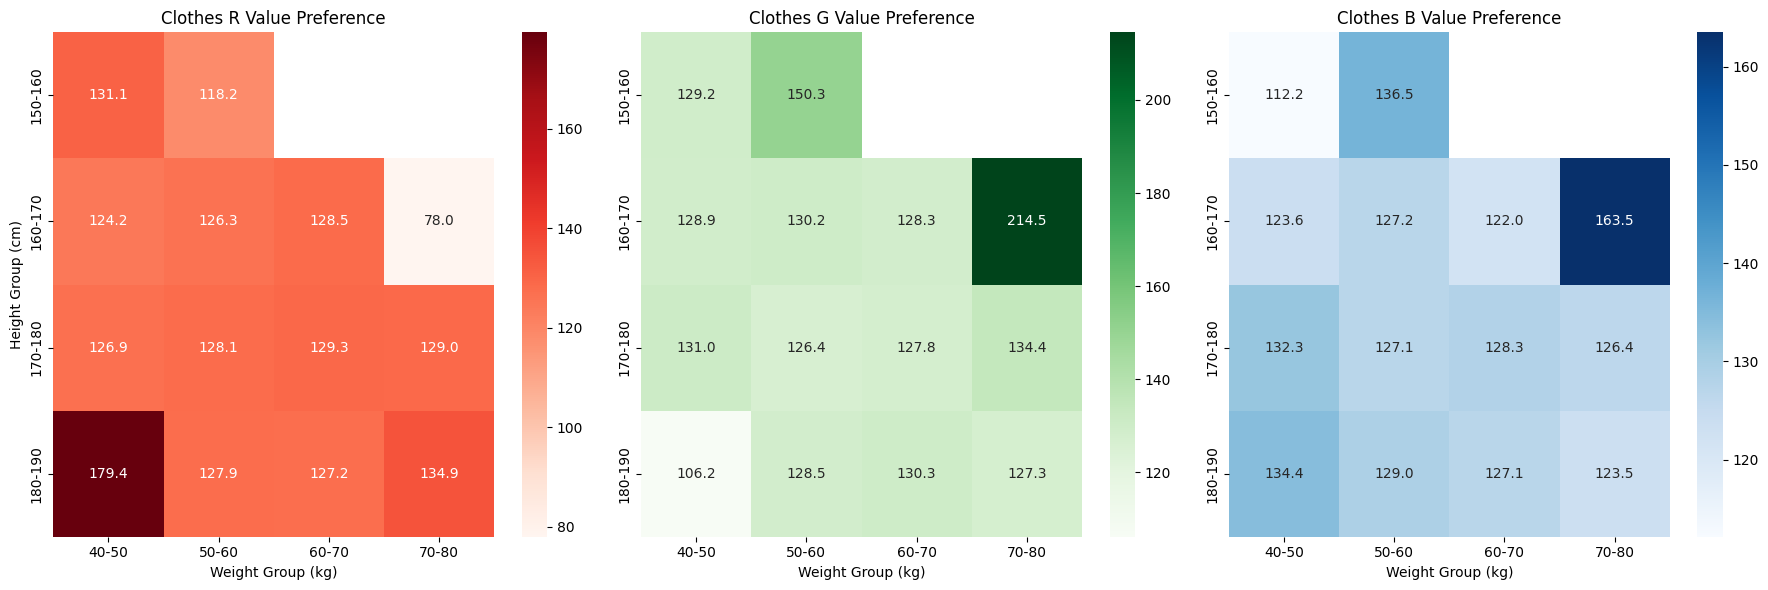

In [ ]:
# 히트맵을 한 줄에 나타내기 위한 코드
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Red 히트맵
sns.heatmap(clothes_r_mean, annot=True, cmap='Reds', fmt='.1f', ax=axes[0])
axes[0].set_title('Clothes R Value Preference')
axes[0].set_xlabel('Weight Group (kg)')
axes[0].set_ylabel('Height Group (cm)')

# Green 히트맵
sns.heatmap(clothes_g_mean, annot=True, cmap='Greens', fmt='.1f', ax=axes[1])
axes[1].set_title('Clothes G Value Preference')
axes[1].set_xlabel('Weight Group (kg)')
axes[1].set_ylabel('')

# Blue 히트맵
sns.heatmap(clothes_b_mean, annot=True, cmap='Blues', fmt='.1f', ax=axes[2])
axes[2].set_title('Clothes B Value Preference')
axes[2].set_xlabel('Weight Group (kg)')
axes[2].set_ylabel('')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
# RGB to HSL 변환 함수
def rgb_to_hsl(r, g, b):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    return h * 360, l, s  # Hue는 0~360 범위로 변환

# RGB 값을 HSL로 변환하여 데이터프레임에 추가
df['Clothes_H'], df['Clothes_L'], df['Clothes_S'] = zip(*df.apply(lambda row: rgb_to_hsl(row['Clothes_R'], row['Clothes_G'], row['Clothes_B']), axis=1))
df['Pants_H'], df['Pants_L'], df['Pants_S'] = zip(*df.apply(lambda row: rgb_to_hsl(row['Pants_R'], row['Pants_G'], row['Pants_B']), axis=1))

# 색상 유형 분류 함수 (Hue 기준)
def categorize_hue(hue):
    if 0 <= hue < 30 or 330 <= hue <= 360:
        return 'Warm (Red/Orange)'
    elif 30 <= hue < 90:
        return 'Warm (Yellow)'
    elif 90 <= hue < 150:
        return 'Cool (Green)'
    elif 150 <= hue < 210:
        return 'Cool (Cyan)'
    elif 210 <= hue < 270:
        return 'Cool (Blue)'
    else:
        return 'Neutral (Purple)'

# 옷과 바지의 색상 유형 분류
df['Clothes_Color_Type'] = df['Clothes_H'].apply(categorize_hue)
df['Pants_Color_Type'] = df['Pants_H'].apply(categorize_hue)

# 키와 몸무게를 그룹화
df['Height_Group'] = pd.cut(df['Height(Centimeter)'], bins=[150, 160, 170, 180, 190], labels=['150-160', '160-170', '170-180', '180-190'])
df['Weight_Group'] = pd.cut(df['Weight(Kilograms)'], bins=[40, 50, 60, 70, 80, 90], labels=['40-50', '50-60', '60-70', '70-80', '80-90'])

# 키와 몸무게 조합별 색상 유형 선호도 계산
clothes_color_preference = df.groupby(['Height_Group', 'Weight_Group'])['Clothes_Color_Type'].value_counts(normalize=True).unstack(fill_value=0)
pants_color_preference = df.groupby(['Height_Group', 'Weight_Group'])['Pants_Color_Type'].value_counts(normalize=True).unstack(fill_value=0)


<ipython-input-57-b4ba6b566da1>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clothes_color_preference = df.groupby(['Height_Group', 'Weight_Group'])['Clothes_Color_Type'].value_counts(normalize=True).unstack(fill_value=0)
<ipython-input-57-b4ba6b566da1>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pants_color_preference = df.groupby(['Height_Group', 'Weight_Group'])['Pants_Color_Type'].value_counts(normalize=True).unstack(fill_value=0)


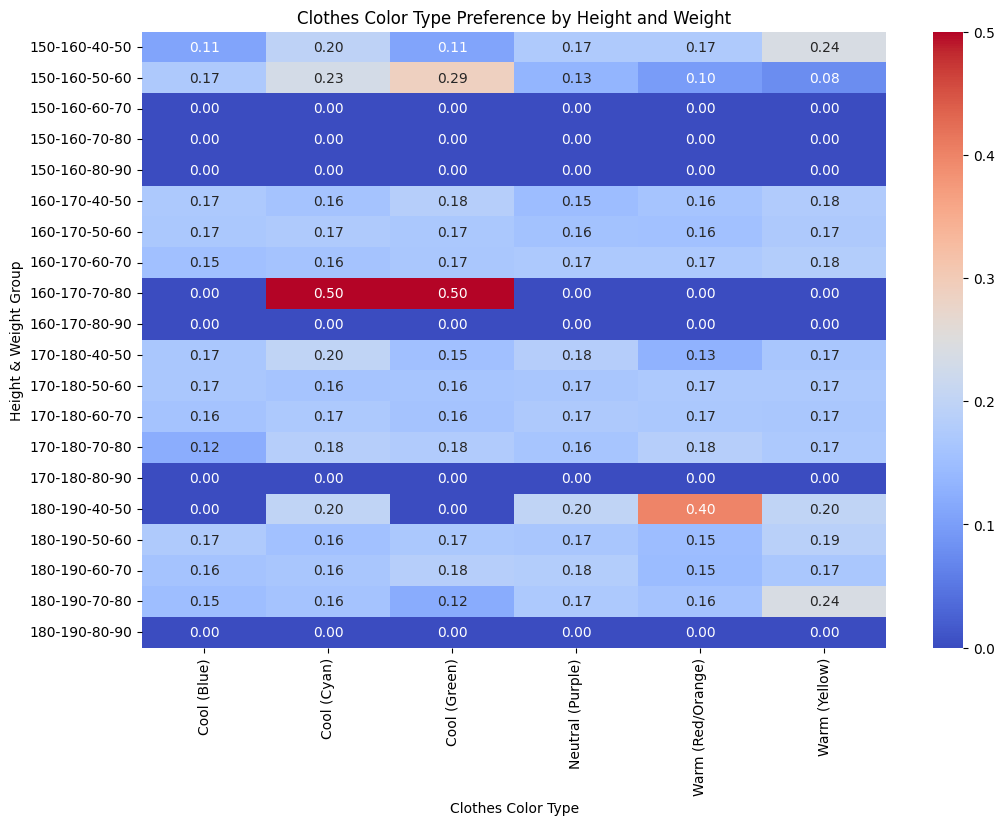

In [ ]:
# 옷 색상 유형 선호도 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(clothes_color_preference, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Clothes Color Type Preference by Height and Weight')
plt.xlabel('Clothes Color Type')
plt.ylabel('Height & Weight Group')
plt.show()

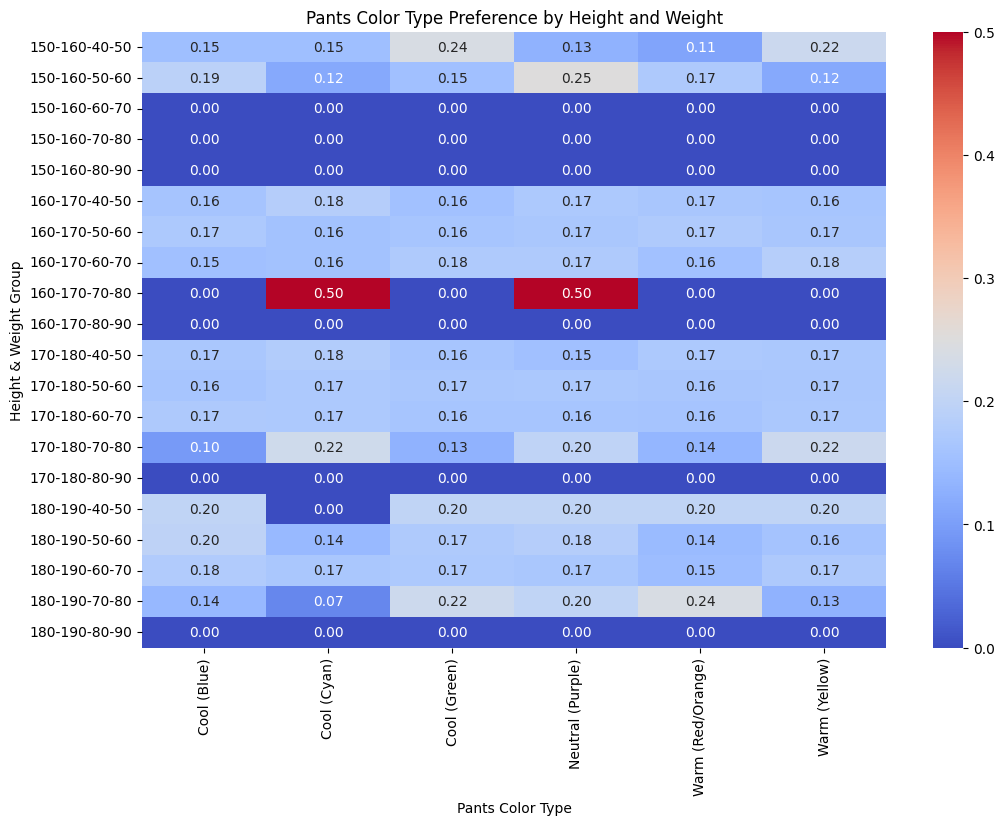

In [ ]:
# 바지 색상 유형 선호도 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pants_color_preference, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pants Color Type Preference by Height and Weight')
plt.xlabel('Pants Color Type')
plt.ylabel('Height & Weight Group')
plt.show()

- 키와 몸무게가 색상 선호도에 영향을 미친다는 것을 보여주며, Warm 색상은 특히 중간 키와 체중 그룹에서 선호되는 경향이 있습니다.

- Cool 색상은 큰 키 or 높은 체중 그룹에서 더 많이 선호되며, Neutral 색상은 대체로 균일하게 선호됩니다.